In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
from sklearn.metrics import classification_report

In [3]:
from keras.utils import to_categorical

2023-09-24 13:08:23.785711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
from keras.datasets import fashion_mnist

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [8]:
from keras.optimizers import Adam

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

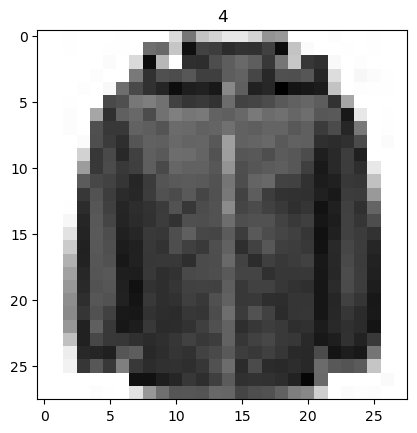

In [12]:
image_index = 555
plt.imshow(X_train[image_index], plt.cm.binary)
plt.title(y_train[image_index])
plt.show()

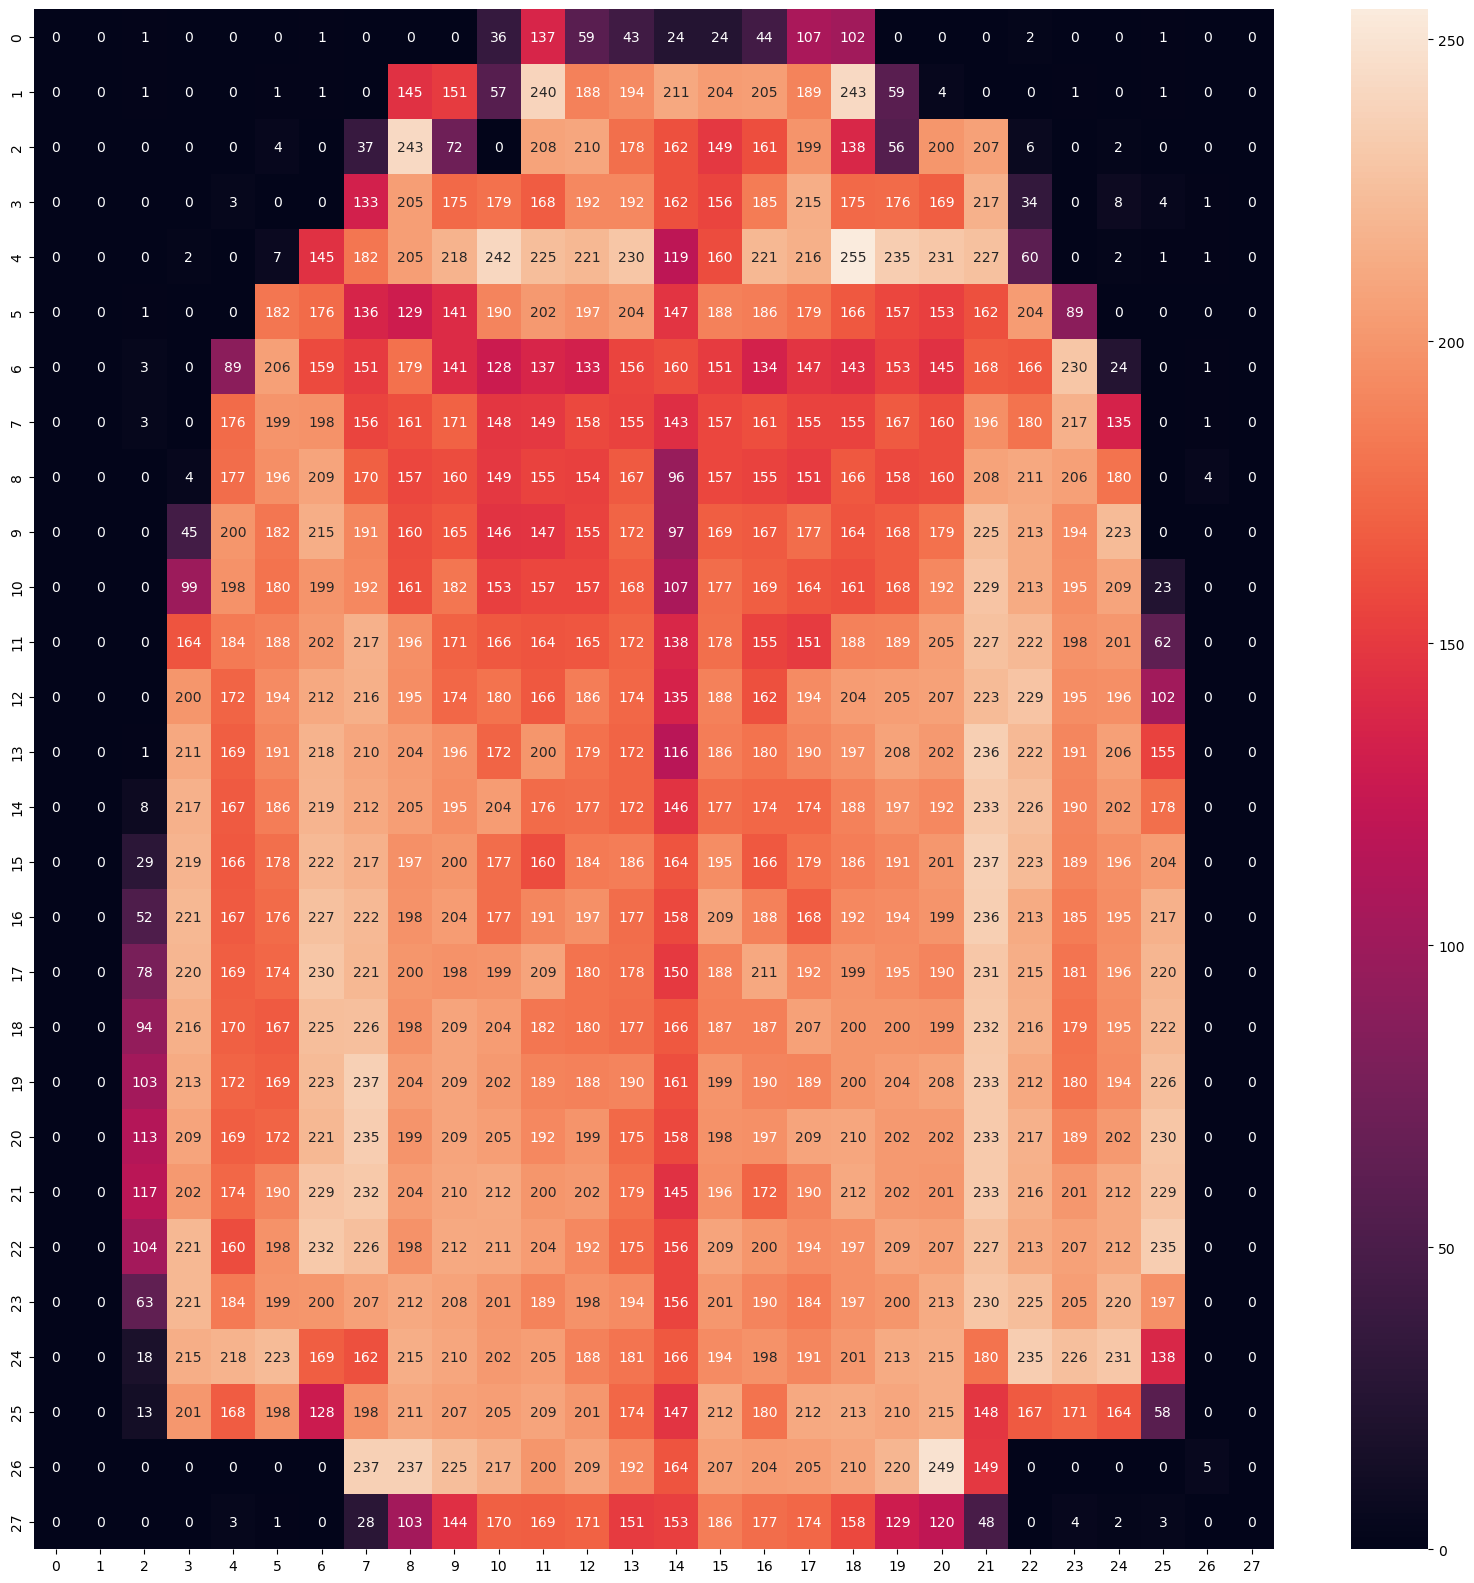

In [13]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(X_train[image_index], annot=True, fmt='.3g')
plt.show()

In [14]:
X_train = np.expand_dims(X_train, axis=3)
X_test = X_test.reshape(10_000, 28, 28, 1)

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
cnn = Sequential()

cnn.add(Conv2D(filters=3,
               kernel_size=(3, 3),
               strides=(1, 1),
               activation='relu',
               input_shape=(28, 28, 1)))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(filters=6,
               kernel_size=(3, 3),
               strides=(1, 1),
               activation='relu',))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())


cnn.add(Conv2D(filters=12,
               kernel_size=(3, 3),
               strides=(1, 1),
               activation='relu',))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=24,
               kernel_size=(3, 3),
               strides=(1, 1),
               activation='relu',))
cnn.add(Dropout(0.2))

cnn.add(Flatten())

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['acc'])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 dropout (Dropout)           (None, 26, 26, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 3)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 6)         168       
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 6)         0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 6)           0         
 g2D)                                                   

In [18]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
es = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint(filepath='./fashion_mnist_checkpoint.h5',
                            save_best_only=True,
                            save_weights_only=False)

In [20]:
y_train = to_categorical(y_train)

In [ ]:
cnn.fit(X_train, y_train,
        validation_split=0.15,
        callbacks=[es, checkpoint],
        epochs=5
       )

Epoch 1/5
1594/1594 [==============================] - 24s 15ms/step - loss: 1.1873 - acc: 0.5354 - val_loss: 0.9985 - val_acc: 0.6678
Epoch 2/5
   4/1594 [..............................] - ETA: 27s - loss: 1.1171 - acc: 0.6094

/Users/shilalamichhane/Desktop/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1594/1594 [==============================] - 24s 15ms/step - loss: 1.0279 - acc: 0.6038 - val_loss: 0.9107 - val_acc: 0.6947
Epoch 3/5
1594/1594 [==============================] - 27s 17ms/step - loss: 0.9429 - acc: 0.6389 - val_loss: 0.8367 - val_acc: 0.7053
Epoch 4/5
1593/1594 [============================>.] - ETA: 0s - loss: 0.8873 - acc: 0.6629